In [2]:
pip install selenium

  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.7 MB 388.9 kB/s eta 0:00:25
   ---------------------------------------- 0.1/9.7 MB 544.7 kB/s eta 0:00:18
   ---------------------------------------- 0.1/9.7 MB 595.3 kB/s eta 0:00:17
    --------------------------------------- 0.2/9.7 MB 803.1 kB/s eta 0:00:12
    --------------------------------------- 0.2/9.7 MB 731.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/9.7 MB 798.9 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.7 MB 824.9 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.7 MB 981.2 kB/s eta 0:00:10
   - -------------------------------------- 0.5/9.7 MB 1.0 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.7 MB 1.1 MB/s eta 0:00:09
   -- ---------

In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.common.action_chains import ActionChains
import time

In [4]:
# Setup WebDriver for Chrome
browser = webdriver.Chrome()

In [5]:
# Open the website
browser.get('https://techbehemoths.com/companies')
print(browser.title)

Top 10+ IT Companies Worldwide (2024) - TechBehemoths


In [6]:
# Wait until elements are loaded
wait = WebDriverWait(browser, 10)
base_url=browser.current_url

In [7]:
company_data = []
for i in range(1,5):
    try:
        print("Current URL:", browser.current_url)
        # Find the next page link using a more specific XPath
        next_page_link=f"{base_url}?page={i}"
        # Navigate to the next page
        browser.get(next_page_link)
        browser.implicitly_wait(15)
        # Find the company names
        company_elements = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "p.co-box__name.font-medium a")))
        # Print the current page URL
        print("Current URL:", browser.current_url) 
        # Extract the company names, links, and additional information
        for company in company_elements:
            try:
                company_name = company.text
                company_link = company.get_attribute('href')
                browser.execute_script("window.open('');")
                browser.switch_to.window(browser.window_handles[1])
                browser.get(company_link)

                # Extract additional information from the company page
                locations = browser.find_element(By.CLASS_NAME, "co-box__loc").text
                #__layout > div > div.page-content > div > div.company-jumbotron.header-spacer.bg-blue > div.container > div > div.col-lg-8 > div.c--descr > div > div.co-lrg-meta > div > div:nth-child(2) > span.value.txt-blue.font-medium
                team_size=browser.find_element(By.CSS_SELECTOR,'div.col-lg-8 > div.c--descr > div > div.co-lrg-meta > div > div:nth-child(2) > span.value.txt-blue.font-medium').text
 
                foundation_year=browser.find_element(By.CSS_SELECTOR,'div:nth-child(1) > span.value.txt-blue.font-medium').text
                print(foundation_year,team_size)
                service_speciality_list = browser.find_element(By.CLASS_NAME, "services-list").text

                # Extract the hourly rate
                hourly_rate_box = browser.find_element(By.CLASS_NAME, "co-box__tltip")
                hover = ActionChains(browser).move_to_element(hourly_rate_box)
                hover.perform()

                try:
                    tooltip_text = browser.find_element(By.CSS_SELECTOR, "span.co-box__tltip-txt.flex-centered.absolute").text
                    print(tooltip_text)
                except NoSuchElementException:
                    tooltip_text = "N/A"

                company_data.append({
                    'Company Name': company_name,
                    'Company Link': company_link,
                    'Locations': locations,
                    'Service Speciality List': service_speciality_list,
                    'Team Size':team_size,
                    'Founding Year':foundation_year,
                    'Hourly Rate': tooltip_text
                })
                browser.close()
                browser.switch_to.window(browser.window_handles[0])
            except NoSuchElementException:
                print(f"Could not extract data for company: {company_name}")
                browser.close()
                browser.switch_to.window(browser.window_handles[0])
                continue       
    except TimeoutException:
        print("Timed out waiting for the elements to load.")
        browser.quit()
        exit()

Current URL: https://techbehemoths.com/companies
Current URL: https://techbehemoths.com/companies?page=1
2012 50-249

2017 2-9

2011 50-249
$30-70/h
2007 1,000-9,999

2020 10-49

2008 50-249

2010 50-249
$30-70/h
2015 50-249

2019 Freelancer
$70-150/h
2023 50-249

2014 50-249
$30-70/h
2010 50-249
Could not extract data for company: Firmao CRM
2023 10-49
Could not extract data for company: Corexta
2000 250-999
$30-70/h
2003 50-249

2015 250-999
$30-70/h
2010 50-249

2013 10-49
$70-150/h
2000 250-999
$30-70/h
2010 10-49
$30-70/h
2018 50-249

2016 50-249
$70-150/h
2021 10-49
$70-150/h
2001 250-999

Current URL: https://techbehemoths.com/companies?page=1
Current URL: https://techbehemoths.com/companies?page=2
2015 50-249
$30-70/h
2001 250-999
$30-70/h
2017 10-49

2007 50-249

2020 50-249

2014 50-249
Could not extract data for company: Xpertech Solutions Group
2004 10-49

2011 50-249

2008 10-49
Could not extract data for company: SunHouse Marketing
2016 50-249

2020 250-999
$30-70/h
2008 

In [69]:
# Save the data to a CSV file
df = pd.DataFrame(company_data)
df.to_csv('company_data.csv', index=False)

# Close the browser
browser.quit()

In [70]:
df

,Company Name,Company Link,Locations,Service Speciality List,Team Size,Founding Year,Hourly Rate
0,Incrementors Web Solutions,https://techbehemoths.com/company/incrementors...,"Sacramento, United States",SEO\nWeb Design,50-249,2012,
1,MONGID | Software House,https://techbehemoths.com/company/mongid,"Ramallah, Palestinian Territory",Custom Software Development\nWeb Development\n...,2-9,2017,
2,Newwave Solutions,https://techbehemoths.com/company/newwave-solu...,"Hanoi, Vietnam",Web Development\nMobile App Development\nWeb D...,50-249,2011,$30-70/h
3,Andersen,https://techbehemoths.com/company/andersen,"Warsaw, Poland",Mobile App Development\nWeb Development\nUX/UI...,"1,000-9,999",2007,
4,Labnify,https://techbehemoths.com/company/Labnify,"Albuquerque, United States",Email Marketing\nConversion Optimization,10-49,2020,
...,...,...,...,...,...,...,...
83,AFIVE Digital Agency,https://techbehemoths.com/company/afive-digita...,"Seaton Ross, United Kingdom",SEO\nWeb Development\nE-Commerce Development\n...,2-9,2005,$30-70/h
84,Tresify Lab,https://techbehemoths.com/company/tresify-lab,"Sylhet, Bangladesh",Web Development\nWeb Design\nUX/UI Design\nSEO...,2-9,2023,<$30/h
85,Ideo Software,https://techbehemoths.com/company/ideo-agency,"Rzeszow, Poland",Custom Software Development\nE-Commerce Develo...,50-249,1999,$70-150/h
86,PRAS,https://techbehemoths.com/company/pras,"Minsk, Belarus",Web Development\nCustom Software Development\n...,10-49,2011,$30-70/h


In [71]:
df.to_csv(r"E:\IT companies web scraping\company_data.csv", index=False)

Now Working on DataSet

Performing EDA 

In [74]:
df.describe()

,Company Name,Company Link,Locations,Service Speciality List,Team Size,Founding Year,Hourly Rate
count,88,88,88,88,88,88,88
unique,85,85,70,85,6,26,5
top,QArea,https://techbehemoths.com/company/qarea,"Warsaw, Poland",Custom Software Development\nWeb Development\n...,50-249,2010,$30-70/h
freq,2,2,5,2,39,10,30


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company Name             88 non-null     object
 1   Company Link             88 non-null     object
 2   Locations                88 non-null     object
 3   Service Speciality List  88 non-null     object
 4   Team Size                88 non-null     object
 5   Founding Year            88 non-null     object
 6   Hourly Rate              88 non-null     object
dtypes: object(7)
memory usage: 4.9+ KB


In [77]:
df.shape

(88, 7)

In [78]:
# Data Cleaning

In [79]:
df.isnull().sum()

Company Name               0
Company Link               0
Locations                  0
Service Speciality List    0
Team Size                  0
Founding Year              0
Hourly Rate                0
dtype: int64

In [80]:
df['Service Speciality List']

0                                       SEO\nWeb Design
1     Custom Software Development\nWeb Development\n...
2     Web Development\nMobile App Development\nWeb D...
3     Mobile App Development\nWeb Development\nUX/UI...
4              Email Marketing\nConversion Optimization
                            ...                        
83    SEO\nWeb Development\nE-Commerce Development\n...
84    Web Development\nWeb Design\nUX/UI Design\nSEO...
85    Custom Software Development\nE-Commerce Develo...
86    Web Development\nCustom Software Development\n...
87                               E-Commerce Development
Name: Service Speciality List, Length: 88, dtype: object

In [81]:
df['Service Speciality List'][1]

'Custom Software Development\nWeb Development\nUX/UI Design\nCybersecurity\nE-Commerce Development\nWeb Design\nGraphic Design\nSEO\nApplication Management & Support\nMobile App Development'

In [82]:
def convert_Service_Speciality_toList(string):
    return string.split("\n")
convert_Service_Speciality_toList(df['Service Speciality List'][1])

['Custom Software Development',
 'Web Development',
 'UX/UI Design',
 'Cybersecurity',
 'E-Commerce Development',
 'Web Design',
 'Graphic Design',
 'SEO',
 'Application Management & Support',
 'Mobile App Development']

In [83]:
#Apply Function: we have data['Service Speciality List'] as string we convert to  list of service 
df['Service Speciality List']=df['Service Speciality List'].apply(lambda x: convert_Service_Speciality_toList(x))

In [84]:
df.groupby('Locations').agg({'Locations':'count'})

,Locations
Locations,
"Adelaide, Australia",1
"Ahmedabad, India",4
"Albany, United States",1
"Albuquerque, United States",1
"Allen, United States",1
...,...
"Warsaw, Poland",5
"White Plains, United States",1
"Wilmington DE, United States",1


In [85]:
#String Split:
df[['state','country']]= df['Locations'].str.split(',', expand=True)

In [87]:
df=df.drop(columns=['Locations'])

In [88]:
df[['country','state']]

,country,state
0,United States,Sacramento
1,Palestinian Territory,Ramallah
2,Vietnam,Hanoi
3,Poland,Warsaw
4,United States,Albuquerque
...,...,...
83,United Kingdom,Seaton Ross
84,Bangladesh,Sylhet
85,Poland,Rzeszow
86,Belarus,Minsk


In [89]:
df.columns

Index(['Company Name', 'Company Link', 'Service Speciality List', 'Team Size',
       'Founding Year', 'Hourly Rate', 'state', 'country'],
      dtype='object')

Data Visualization

In [90]:
import matplotlib.pyplot as plt

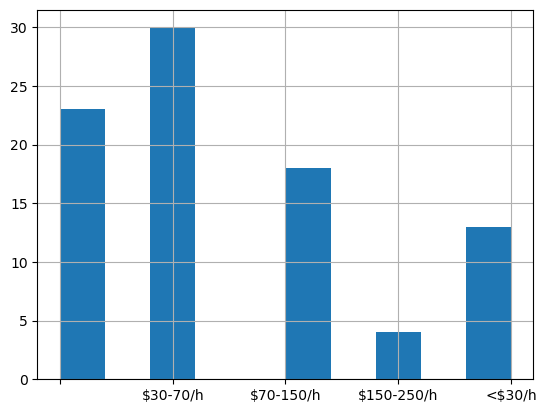

In [91]:
df['Hourly Rate'].hist()
plt.show()

<Axes: xlabel='Hourly Rate', ylabel='country'>

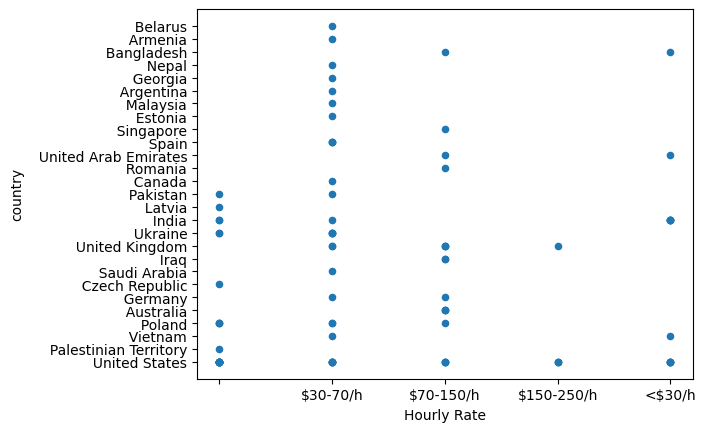

In [92]:
df.plot.scatter(x='Hourly Rate',y='country')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '  United States'),
  Text(1, 0, '  Palestinian Territory'),
  Text(2, 0, '  Vietnam'),
  Text(3, 0, '  Poland'),
  Text(4, 0, '  Australia'),
  Text(5, 0, '  Germany'),
  Text(6, 0, '  Czech Republic'),
  Text(7, 0, '  Saudi Arabia'),
  Text(8, 0, '  Iraq'),
  Text(9, 0, '  United Kingdom'),
  Text(10, 0, '  Ukraine'),
  Text(11, 0, '  India'),
  Text(12, 0, '  Latvia'),
  Text(13, 0, '  Pakistan'),
  Text(14, 0, '  Canada'),
  Text(15, 0, '  Romania'),
  Text(16, 0, '  United Arab Emirates'),
  Text(17, 0, '  Spain'),
  Text(18, 0, '  Singapore'),
  Text(19, 0, '  Estonia'),
  Text(20, 0, '  Malaysia'),
  Text(21, 0, '  Argentina'),
  Text(22, 0, '  Georgia'),
  Text(23, 0, '  Nepal'),
  Text(24, 0, '  Bangladesh'),
  Text(25, 0, '  Armenia'),
  Text(26, 0, '  Belarus')])

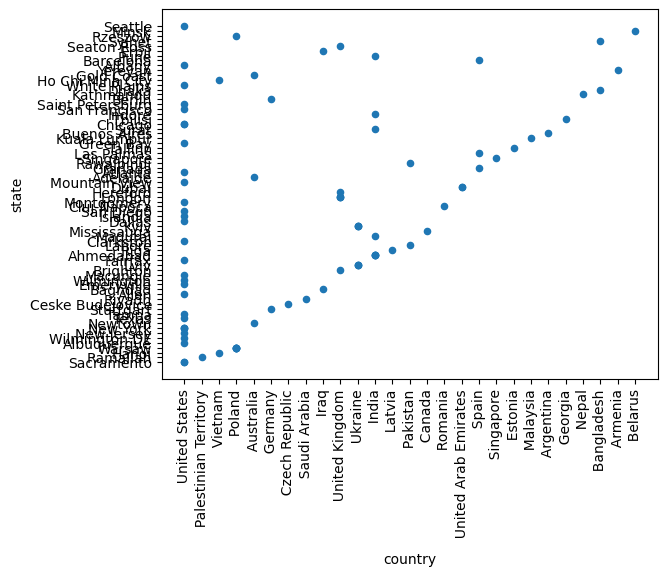

In [93]:
df.plot.scatter(x='country',y='state')
plt.xticks(rotation=90)

<Axes: xlabel='Hourly Rate'>

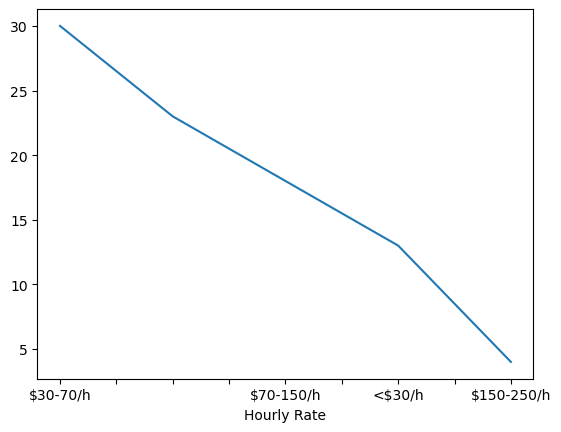

In [94]:
df['Hourly Rate'].value_counts().plot()

<Axes: xlabel='Founding Year', ylabel='Hourly Rate'>

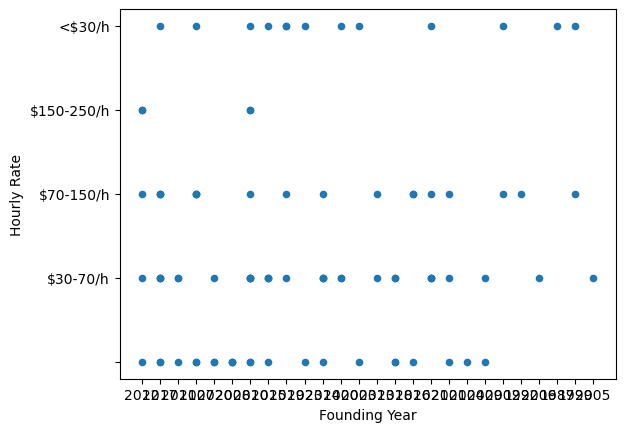

In [96]:
df.plot.scatter(x='Founding Year',y='Hourly Rate')